In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
plt.rcParams['figure.figsize'] = 8,8

In [3]:
nn_source_preds = np.load('../../source_keras_preds.np.npy')
nn_source_probs = np.load('../../source_keras_probs.np.npy')

lr_source_preds = np.load('../logs/actual_prob_lr_source.npy')
lr_source_probs = np.load('../logs/predicted_prob_lr_source.npy')

mnb_source_preds = np.load('../logs/ys_mnb.npy')
mnb_source_probs = np.load('../logs/probs_mnb(1).npy')[:,1]

bnb_source_preds = np.load('../logs/ys_bnb.npy')
bnb_source_probs = np.load('../logs/probs_bnb(1).npy')[:,1]


rf_results = pd.read_csv("../logs/rf_results.csv")
rf_source_preds = rf_results['be_preds'].values
rf_source_probs = rf_results['be_probs'].values

In [4]:
nn_nonsource_preds = np.load('../../nonsource_keras_preds.np.npy')
nn_nonsource_probs = np.load('../../nonsource_keras_probs.np.npy')

lr_nonsource_preds = np.load('../logs/actual_prob_lr.npy')
lr_nonsource_probs = np.load('../logs/predicted_prob_lr.npy')

mnb_nonsource_preds = np.load('../logs/ys_mnb_nonsource.npy')
mnb_nonsource_probs = np.load('../logs/probs_mnb_nonsource.npy')[:,1]

bnb_nonsource_preds = np.load('../logs/ys_bnb_nonsource.npy')
bnb_nonsource_probs = np.load('../logs/probs_bnb_nonsource.npy')[:,1]


rf_results = pd.read_csv("../logs/rf_results_nonsource.csv")
rf_nonsource_preds = rf_results['be_preds'].values
rf_nonsource_probs = rf_results['be_probs'].values


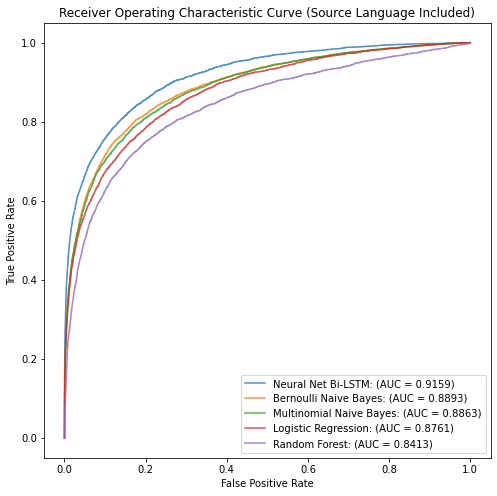

In [5]:
models = [
    {"name": "Neural Net Bi-LSTM",  "preds": nn_source_preds, "probs": nn_source_probs},
    {"name": "Bernoulli Naive Bayes",   "preds": bnb_source_preds, "probs": bnb_source_probs},
    {"name": "Multinomial Naive Bayes",   "preds": mnb_source_preds, "probs": mnb_source_probs},
    {"name": "Logistic Regression",  "preds": lr_source_preds, "probs": lr_source_probs},
    {"name": "Random Forest", "preds": mnb_source_preds, "probs": rf_source_probs}
]

plt.figure()

for model in models:
    model['fpr'], model['tpr'], _ = metrics.roc_curve(model['preds'], model['probs'])
    model['auc'] = metrics.auc(model['fpr'], model['tpr'])
    plt.plot(model['fpr'], model['tpr'], alpha = 0.8, label = '{}: (AUC = {})'.format(model['name'], round(model['auc'], 4)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Source Language Included)')
plt.legend(loc="lower right")
plt.show()

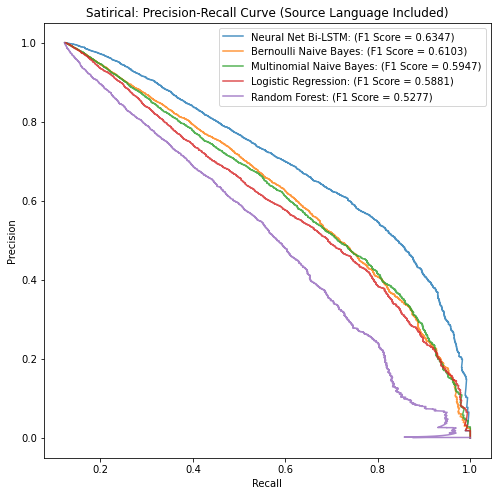

In [6]:
plt.figure()

for model in models:
    model['precision'], model['recall'], _ = metrics.precision_recall_curve(model['preds'], model['probs'])
    model['f1score'] = metrics.f1_score(model['preds'], np.where(model['probs'] > 0.5, 1, 0), pos_label=1)
    plt.plot(model['precision'], model['recall'], alpha = 0.8, label = '{}: (F1 Score = {})'.format(model['name'], round(model['f1score'], 4)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Satirical: Precision-Recall Curve (Source Language Included)')
plt.legend(loc="upper right")
plt.show()

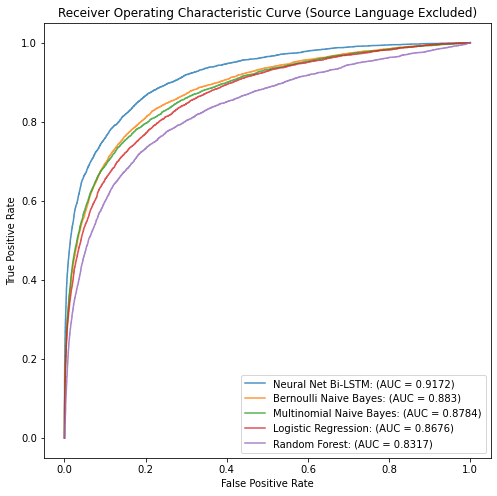

In [7]:
models = [
    {"name": "Neural Net Bi-LSTM",  "preds": nn_nonsource_preds, "probs": nn_nonsource_probs},
    {"name": "Bernoulli Naive Bayes",   "preds": bnb_nonsource_preds, "probs": bnb_nonsource_probs},
    {"name": "Multinomial Naive Bayes",   "preds": mnb_nonsource_preds, "probs": mnb_nonsource_probs},
    {"name": "Logistic Regression",  "preds": lr_nonsource_preds, "probs": lr_nonsource_probs},
    
    {"name": "Random Forest", "preds": mnb_nonsource_preds, "probs": rf_nonsource_probs}
]

plt.figure()

for model in models:
    model['fpr'], model['tpr'], _ = metrics.roc_curve(model['preds'], model['probs'])
    model['auc'] = metrics.auc(model['fpr'], model['tpr'])
    plt.plot(model['fpr'], model['tpr'], alpha = 0.8, label = '{}: (AUC = {})'.format(model['name'], round(model['auc'], 4)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Source Language Excluded)')
plt.legend(loc="lower right")
plt.show()

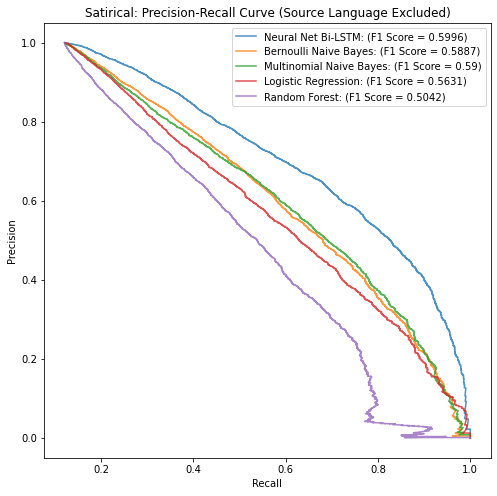

In [8]:
plt.figure()

for model in models:
    model['precision'], model['recall'], _ = metrics.precision_recall_curve(model['preds'], model['probs'])
    model['f1score'] = metrics.f1_score(model['preds'], np.where(model['probs'] > 0.5, 1, 0), pos_label=1)
    plt.plot(model['precision'], model['recall'], alpha = 0.8, label = '{}: (F1 Score = {})'.format(model['name'], round(model['f1score'], 4)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Satirical: Precision-Recall Curve (Source Language Excluded)')
plt.legend(loc="upper right")
plt.show()